<a href="https://colab.research.google.com/github/riccardoorru/painting_genre_recognition/blob/main/4_CNN_unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random
from google.colab import drive
from google.colab import files
import shutil

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
import pickle
seed(1)
tf.random.set_seed(1)

In [ ]:
# mount drive
from google.colab import drive
drive.mount('RiccardoOrruProject', force_remount=True)

Mounted at RiccardoOrruProject


In [ ]:
root_path = "RiccardoOrruProject/MyDrive/Deep Learning Project"
dataset_dir = os.path.join(root_path, "Dataset")
train_dir = os.path.join(dataset_dir, 'train/genre')
test_dir = os.path.join(dataset_dir, 'val/genre')

In [ ]:
#Set the parameter used to load the dataset
BATCH_SIZE = 64
IMAGE_HEIGHT = 180
IMAGE_WIDTH = 180

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    subset="training",
    shuffle=True,
    seed=1024
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    subset="validation",
    shuffle=True,
    seed=1024
)

test_dataset = image_dataset_from_directory(
    test_dir,  # Sostituisci con il percorso della directory di test
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False  # Non è necessario mescolare il set di test
)



Found 6194 files belonging to 14 classes.
Using 5575 files for training.
Found 6194 files belonging to 14 classes.
Using 619 files for validation.
Found 1564 files belonging to 14 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.regularizers import l2

# Definizione del modello con dropout e regolarizzazione L2
model = models.Sequential()

model.add(layers.Rescaling(1./255, input_shape=(180, 180, 3)))

model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu", padding="valid"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Aggiunta di dropout
model.add(layers.Dense(256, activation="relu", kernel_regularizer=l2(0.01)))  # Regolarizzazione L2
model.add(layers.Dropout(0.25))  # Aggiunta di dropout

model.add(layers.Dense(14, activation="softmax"))

# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Assicurati di utilizzare la loss corretta per il tuo problema
              metrics=['accuracy'])


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])



In [ ]:
history = model.fit(train_dataset, epochs=75, validation_data=validation_dataset)


Epoch 1/75
88/88 [==============================] - 1070s 11s/step - loss: 3.5179 - accuracy: 0.3622 - val_loss: 2.4235 - val_accuracy: 0.3748
Epoch 2/75
88/88 [==============================] - 40s 415ms/step - loss: 2.2233 - accuracy: 0.3688 - val_loss: 2.1918 - val_accuracy: 0.3700
Epoch 3/75
88/88 [==============================] - 40s 406ms/step - loss: 2.0752 - accuracy: 0.3751 - val_loss: 2.0045 - val_accuracy: 0.3877
Epoch 4/75
88/88 [==============================] - 40s 420ms/step - loss: 2.0231 - accuracy: 0.3810 - val_loss: 2.0392 - val_accuracy: 0.3813
Epoch 5/75
88/88 [==============================] - 39s 419ms/step - loss: 1.9819 - accuracy: 0.3821 - val_loss: 1.9625 - val_accuracy: 0.3942
Epoch 6/75
88/88 [==============================] - 40s 422ms/step - loss: 1.9711 - accuracy: 0.3794 - val_loss: 1.9649 - val_accuracy: 0.3926
Epoch 7/75
88/88 [==============================] - 42s 425ms/step - loss: 1.9389 - accuracy: 0.3858 - val_loss: 1.9061 - val_accuracy: 0.3910

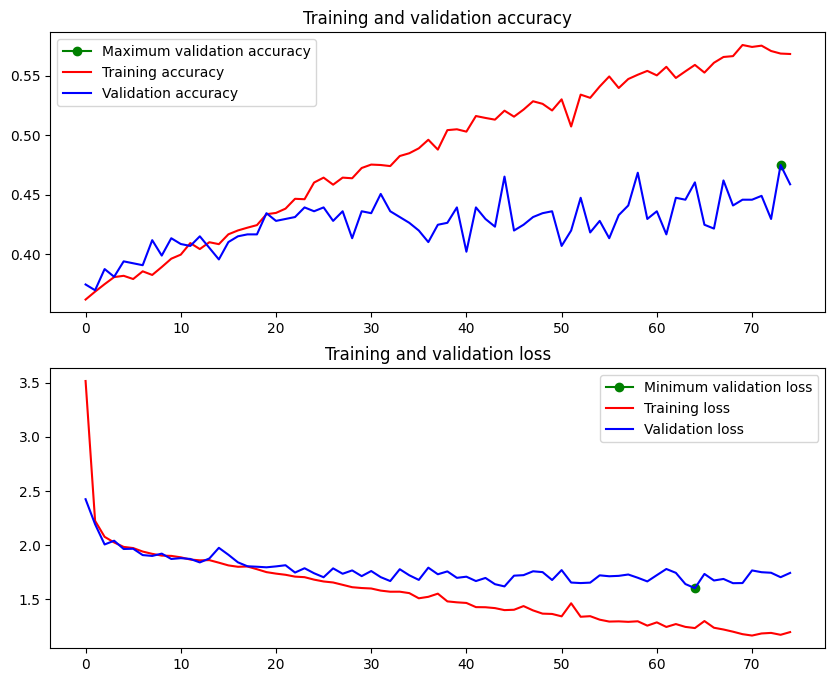

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

i_acc = np.argmax(val_acc)
x_min_acc = epochs[i_acc]
y_min_acc = val_acc[i_acc]
ax1.plot(x_min_acc, y_min_acc, 'g', marker='o', label="Maximum validation accuracy")

ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()

i_loss = np.argmin(val_loss)
x_min_loss = epochs[i_loss]
y_min_loss = val_loss[i_loss]
ax2.plot(x_min_loss, y_min_loss, 'g', marker='o', label="Minimum validation loss")

ax2.plot(epochs, loss, 'r', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()


In [ ]:

test_loss, test_accuracy = model.evaluate(test_dataset)

25/25 [==============================] - 280s 11s/step - loss: 1.9436 - accuracy: 0.4821


In [ ]:

print("Loss: " + str(test_loss))
print("Accuracy: " + str(test_accuracy))

history.history["test_loss"] = test_loss
history.history["test_accuracy"] = test_accuracy

Loss: 1.943560242652893
Accuracy: 0.48209717869758606


In [ ]:


dir_name = os.path.join(root_path, "Models")
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
model.save(os.path.join(dir_name, 'cnnUnbalancedDS.h5'))
with open(os.path.join(dir_name, 'trainHistory'), 'wb') as file_pi:
    pickle.dump(history.history, file_pi)



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
